In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data Set

In [4]:
data = pd.read_excel('Data_Train.xlsx')

In [5]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
data.shape

(10683, 11)

In [7]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [9]:
print(data.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [10]:
data=data.dropna()

In [87]:
print(data.isnull().sum())

Airline            0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
weekday            0
dtype: int64


In [89]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [90]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [91]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [92]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([data, Airline, Source, Destination], axis = 1)

In [93]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)


# # EDA

From description we can see that Date_of_Journey is a object data type,\ Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.

.dt.day method will extract only day of that date\ *.dt.month method will extract only month of that date

# Extracting day,month,year,weekday from Date of Journey

Question : Which part of the year is the busiest?

Question : Which part of the week is the busiest?

In [14]:
data['Journey_Day'] = pd.to_datetime(data.Date_of_Journey, format='%d/%m/%Y').dt.day
data['Journey_Month'] = pd.to_datetime(data.Date_of_Journey, format='%d/%m/%Y').dt.month
data['weekday']= pd.to_datetime(data.Date_of_Journey, format='%d/%m/%Y').dt.weekday

In [15]:
data.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)

In [16]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,4


In [17]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'weekday'],
      dtype='object')

Question : Calculating average fligt time 

# Converting duration into minutes

In [18]:
def duration(test):
    test = test.strip()
    total=test.split(' ')
    to=total[0]
    hrs=(int)(to[:-1])*60
    if((len(total))==2):
        mint=(int)(total[1][:-1])
        hrs=hrs+mint
    test=str(hrs)
    return test
data['Duration']=data['Duration'].apply(duration)

In [19]:
data['Duration'].nunique()

367

Questions : at what tine of the day the travellers, love to travel?

# Extracting whether its a morning,evening,night or afternoon flight from departure time & arrival time of the flight

In [20]:
def deparrtime(x):
    x=x.strip()
    tt=(int)(x.split(':')[0])
    if(tt>=16 and tt<21):
        x='Evening'
    elif(tt>=21 or tt<5):
        x='Night'
    elif(tt>=5 and tt<11):
        x='Morning'
    elif(tt>=11 and tt<16):
        x='Afternoon'
    return x
data['Dep_Time']=data['Dep_Time'].apply(deparrtime)
data['Arrival_Time']=data['Arrival_Time'].apply(deparrtime)

Question  : hwo many times a flight stops in an journey, with respect to company?

# Converting total_stops to 0,1,2,3 and so on

In [21]:
def stops(x):
    if(x=='non-stop'):
        x=str(0)
    else:
        x.strip()
        stps=x.split(' ')[0]
        x=stps
    return x
data['Total_Stops']=data['Total_Stops'].apply(stops)

In [22]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,Night,Night,170,0,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,Morning,Afternoon,445,2,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,Morning,Night,1140,2,No info,13882,9,6,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,Evening,Night,325,1,No info,6218,12,5,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,Evening,Night,285,1,No info,13302,1,3,4


In [23]:
data=data.drop(['Route'], axis=1)

In [24]:
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,Night,170,0,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,Morning,Afternoon,445,2,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,Morning,Night,1140,2,No info,13882,9,6,6
3,IndiGo,Kolkata,Banglore,Evening,Night,325,1,No info,6218,12,5,6
4,IndiGo,Banglore,New Delhi,Evening,Night,285,1,No info,13302,1,3,4


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Dep_Time         10682 non-null  object
 4   Arrival_Time     10682 non-null  object
 5   Duration         10682 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   Journey_Day      10682 non-null  int64 
 10  Journey_Month    10682 non-null  int64 
 11  weekday          10682 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 1.1+ MB


In [26]:
data["Duration"] = data["Duration"].astype(int)
data["Journey_Day"] = data["Journey_Day"].astype(object)
data["Journey_Month"] = data["Journey_Month"].astype(object)
data["weekday"] = data["weekday"].astype(object)

In [27]:
df1 =data.copy() 

In [28]:
df1["Journey_Month"]=df1["Journey_Month"].replace({1: "Jan", 3:"March",4:"April",5:"May",6:"June"})

In [29]:
df1["Journey_Month"]=df1["Journey_Month"].astype(object)

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Dep_Time         10682 non-null  object
 4   Arrival_Time     10682 non-null  object
 5   Duration         10682 non-null  int32 
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   Journey_Day      10682 non-null  object
 10  Journey_Month    10682 non-null  object
 11  weekday          10682 non-null  object
dtypes: int32(1), int64(1), object(10)
memory usage: 1.0+ MB


[Text(0, 0, 'March'),
 Text(1, 0, 'May'),
 Text(2, 0, 'June'),
 Text(3, 0, 'April')]

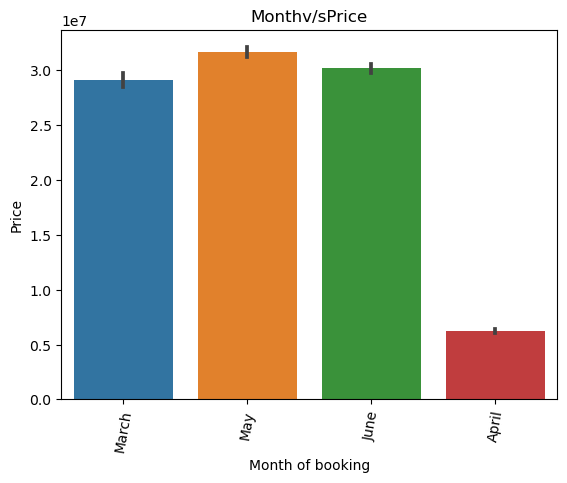

In [32]:
#Journey month v/s total fare

v1=sns.barplot(x='Journey_Month', y='Price', data=df1,estimator=sum)
v1.set_title('Monthv/sPrice')
v1.set_ylabel('Price')
v1.set_xlabel('Month of booking')
v1.set_xticklabels(v1.get_xticklabels(), rotation=80)

In [33]:
#count of flights per month

top_month=df1.Journey_Month.value_counts().head(10)
top_month

May      3465
June     3414
March    2724
April    1079
Name: Journey_Month, dtype: int64

Analysis :
We see that the total count of flight is maximum towards the month-May which can also be concluded from the above bar plot which shows that the sum of fare is maximum in May.
This can be due to : Summer vacations in the month of may for schools/colleges, hence most families are also generally going for vacations around this time.
The count of flights is lowest on the month of April, this can be because : Schools,colleges have their final exams around this time, offices are mostly busy in the month of April as it is the end of Quarter 1.

In [34]:
monthly_avg=df1.groupby(['Journey_Month']).agg({'Price':np.mean}).reset_index()

<AxesSubplot:xlabel='Journey_Month'>

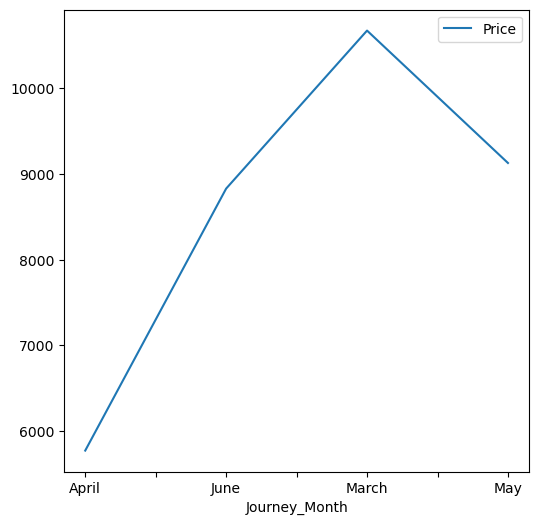

In [32]:
#Journey month v/s Averagefare
monthly_avg.plot(x='Journey_Month',y='Price',figsize=(6,6))

Analysis : We see that the average fare price is highest the month of March , this can be because people usually book the fights 2-3 months prior to their date of journey which leads to higher demand and hence higher fare prices.(since the count of tickets booked for travelling in May is the most, prior bookings are done in March

<function matplotlib.pyplot.show(close=None, block=None)>

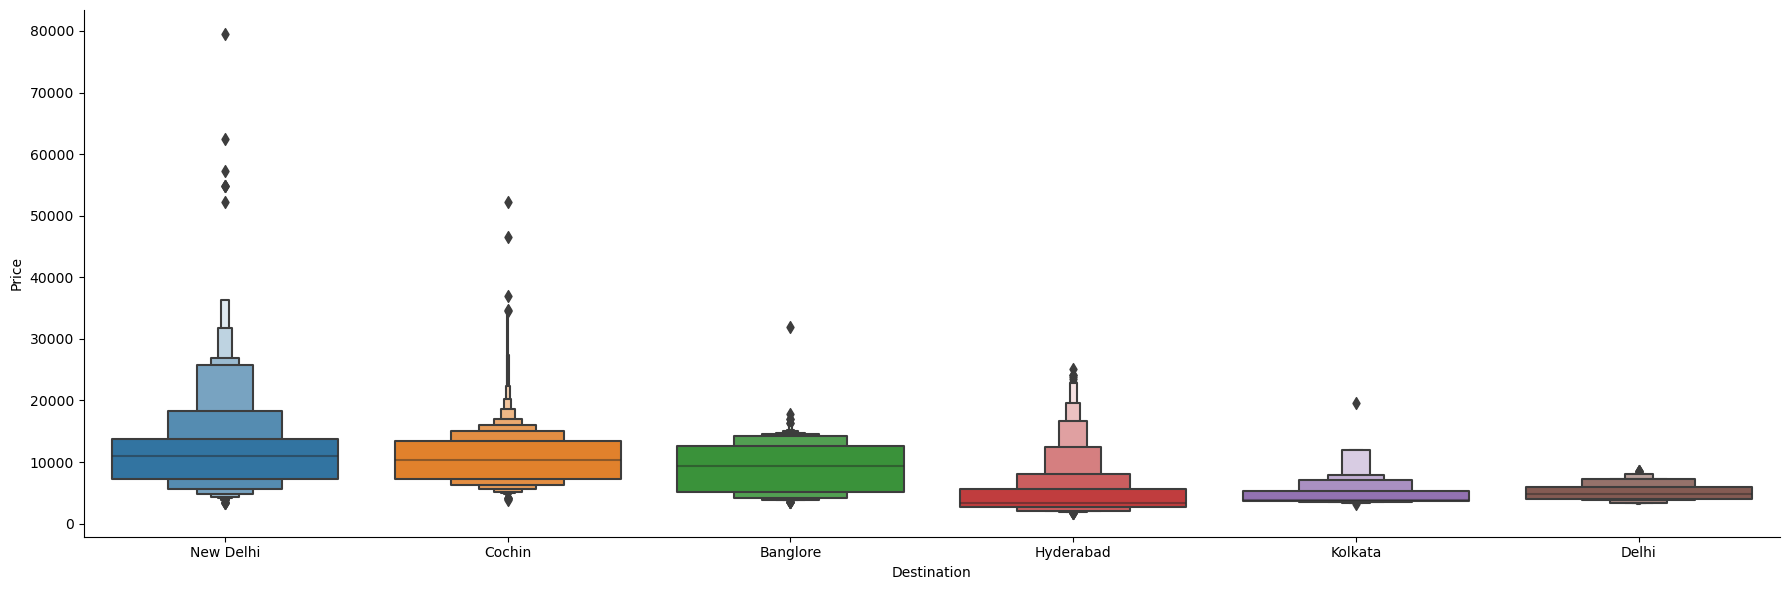

In [35]:
# Destination vs AveragePrice

sns.catplot(y='Price',x='Destination',data= df1.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [63]:
data["Destination"].value_counts()

Cochin       4476
Banglore     2867
Delhi        1265
New Delhi     923
Hyderabad     695
Kolkata       381
Name: Destination, dtype: int64

In [65]:
data["Total_Stops"].value_counts()

1    5625
0    3491
2    1461
3      29
4       1
Name: Total_Stops, dtype: int64

Analysis :
The airfare price range in Delhi & New Delhi is the maximum, this can be due to: Jet fuel prices in Delhi had increased in the year of 2018 by 26.4%, it is also the National Capital, political seat of power and a highly visited place for vacations(same for bangalore & cochin)
The same reasoning can be given for higher price range in delhi as the source of the flight

<function matplotlib.pyplot.show(close=None, block=None)>

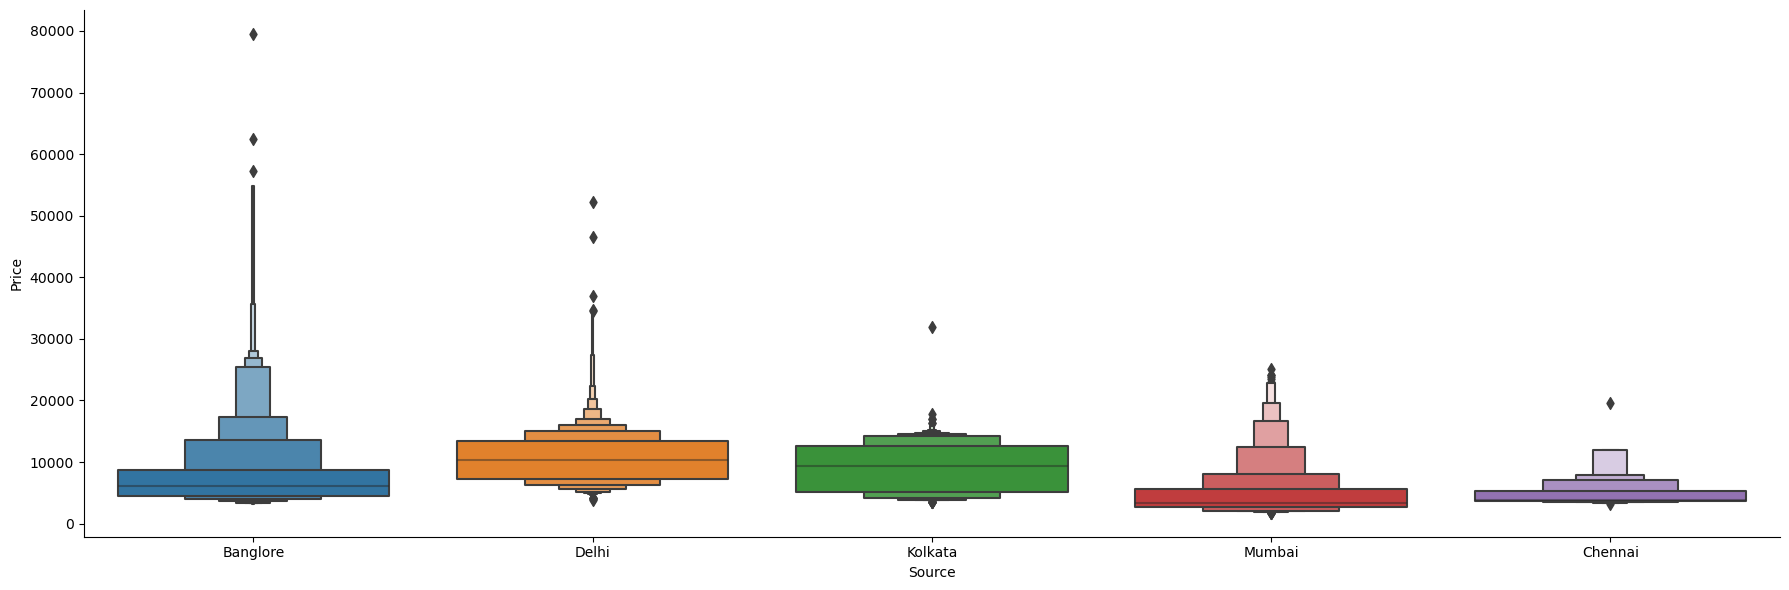

In [37]:
# Source vs AveragePrice

sns.catplot(y='Price',x='Source',data= data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

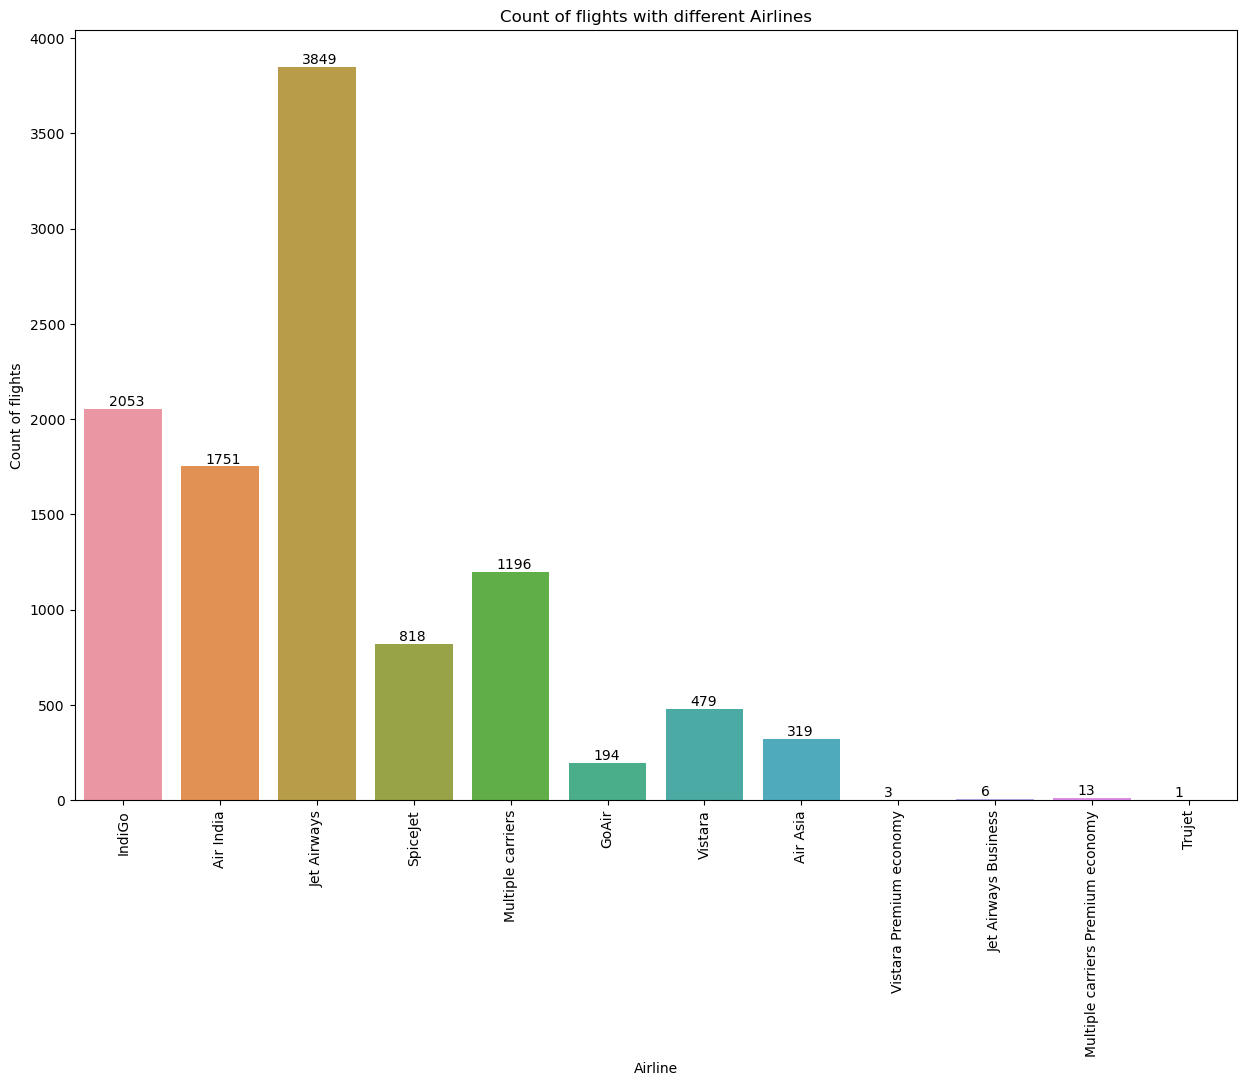

In [38]:
#Count of flights v/s Airline
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =data)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

#Analysis : from the diagram below we can see that jet airways Business have the highest price apart from the first airline almost all are having similar media

<function matplotlib.pyplot.show(close=None, block=None)>

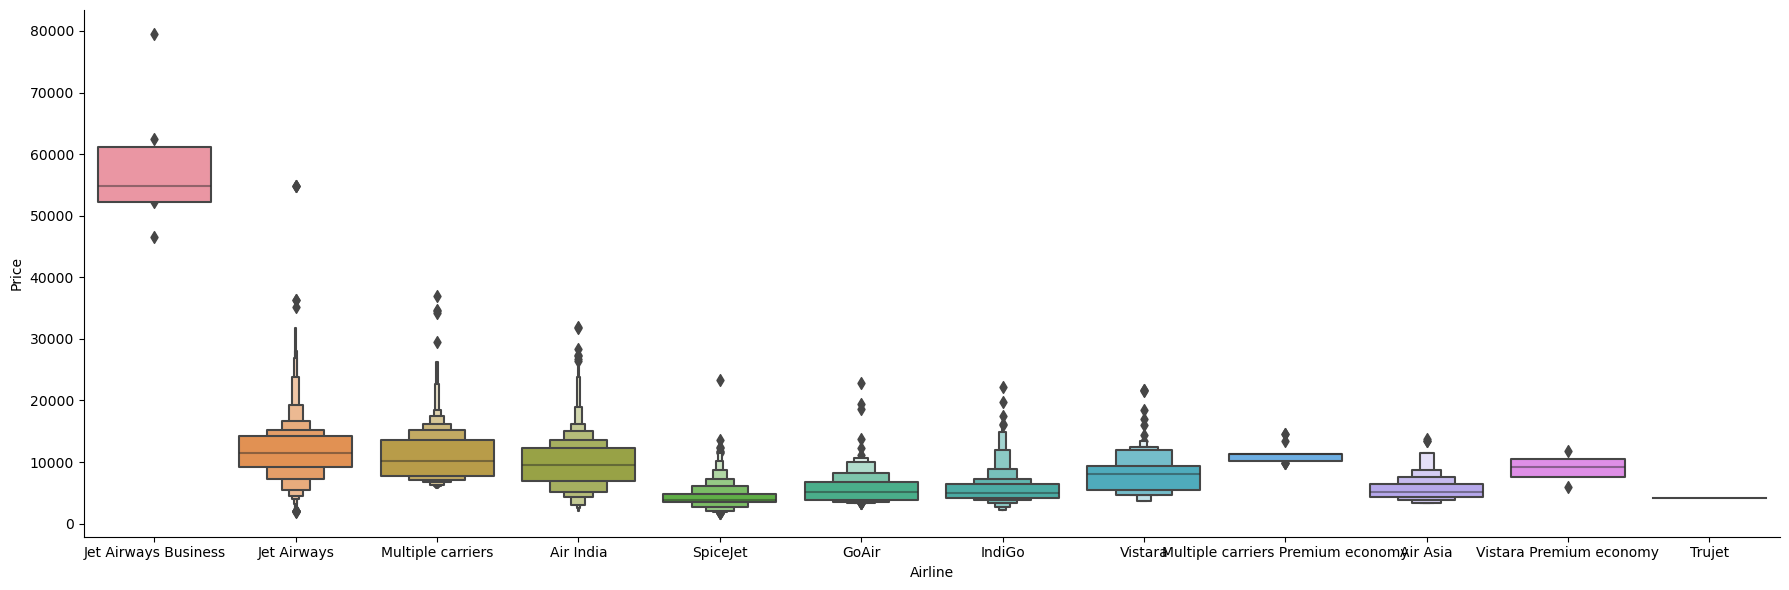

In [40]:
# Airline vs AveragePrice

sns.catplot(y='Price',x='Airline',data= data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

Analysis :
Jet airways and Air India are full service airlines are and always highly priced due to various amenities they provide. Low-cost carriers like indigo and spicejet have a lower and similar fare range 

<AxesSubplot:xlabel='Duration', ylabel='Price'>

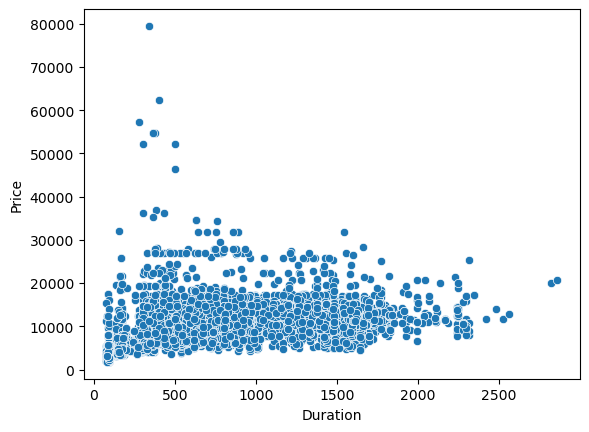

In [37]:
#duration v/s AveragePrice

sns.scatterplot(data=data, x='Duration', y='Price')

Analysis :
We know that duration( or distance) plays a major role in affecting air ticket prices but we see no such pattern here, as there must be there are other significant factors affecting air fare like type of airline, destination of flight, date of journey of flight(higher if collides with a public holiday)

[Text(0, 0, 'Night'),
 Text(1, 0, 'Morning'),
 Text(2, 0, 'Evening'),
 Text(3, 0, 'Afternoon')]

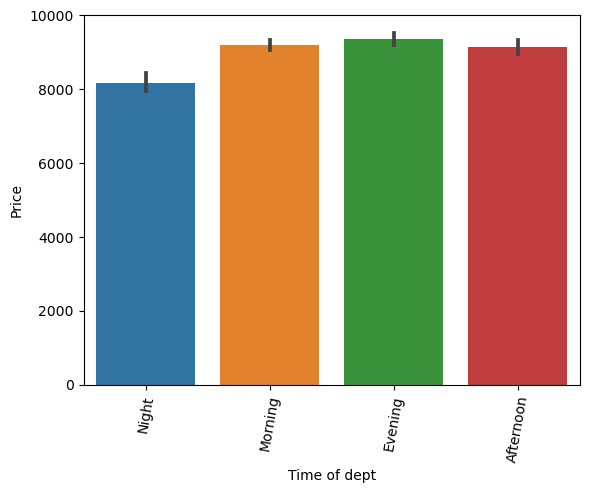

In [42]:
#Deptarure time v/s AveragePrice

v2=sns.barplot(x='Dep_Time', y='Price', data=data)
v2.set_ylabel('Price')
v2.set_xlabel('Time of dept')
v2.set_xticklabels(v2.get_xticklabels(), rotation=80)

In [44]:
# time of departure v/s count of flights

top_time=data.Dep_Time.value_counts().head(10)
top_time

Morning      4331
Evening      2829
Afternoon    2017
Night        1505
Name: Dep_Time, dtype: int64

Analysis:
Early Morning flights are always cheaper and so are midnight flight prices.
Evening flight fares are expensive due to more demand and is the most convenient time to tarvel for most people.


[Text(0, 0, 'Night'),
 Text(1, 0, 'Afternoon'),
 Text(2, 0, 'Morning'),
 Text(3, 0, 'Evening')]

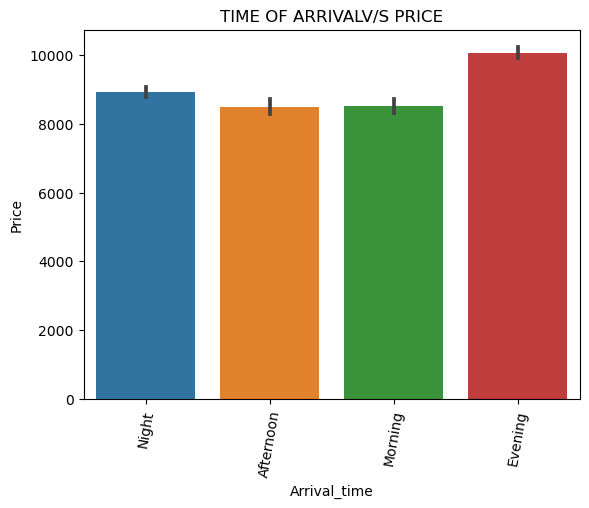

In [45]:
#TIME OF ARRIVAL V/S average price

v3=sns.barplot(x='Arrival_Time', y='Price', data=data)
v3.set_title('TIME OF ARRIVALV/S PRICE')
v3.set_ylabel('Price')
v3.set_xlabel('Arrival_time')
v3.set_xticklabels(v3.get_xticklabels(), rotation=80)

[Text(0, 0, '0'),
 Text(1, 0, '2'),
 Text(2, 0, '1'),
 Text(3, 0, '3'),
 Text(4, 0, '4')]

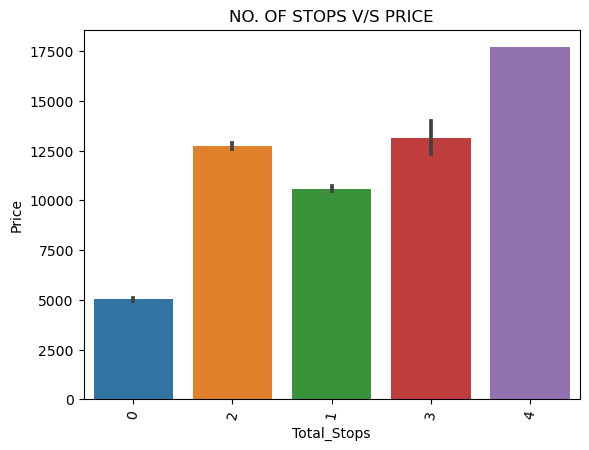

In [49]:
#total stops v/s average price
v4=sns.barplot(x='Total_Stops', y='Price', data=data)
v4.set_title('NO. OF STOPS V/S PRICE')
v4.set_ylabel('Price')
v4.set_xlabel('Total_Stops')
v4.set_xticklabels(v4.get_xticklabels(), rotation=80)

Analysis : As a direct/non-stop flight is accounting for fare of only one flight for a trip, its average fair is the least. As the no. of stops/layovers increase, the fare price goes up accounting for no. of flights and due to other resources being used up for the same

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6')]

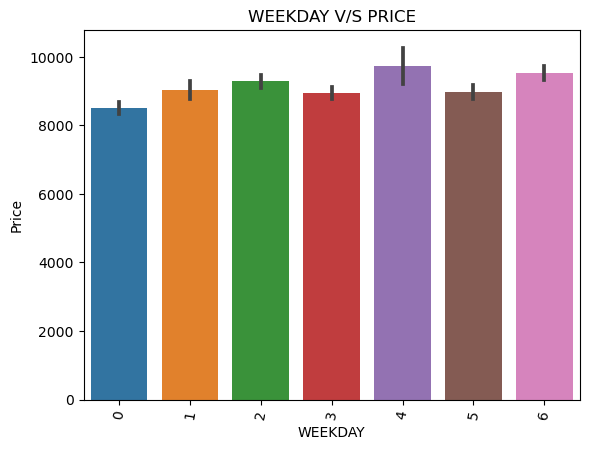

In [51]:
#WEEKDAY V/S average price
v4=sns.barplot(x='weekday', y='Price', data=data)
v4.set_title('WEEKDAY V/S PRICE')
v4.set_ylabel('Price')
v4.set_xlabel('WEEKDAY')
v4.set_xticklabels(v4.get_xticklabels(), rotation=80)

Analysis : We see that prices are highest on a friday, that may be because this is when airlines start raising prices to make up for the lower prices before and also because weekdays are off for most people so they are mostly travelling to or travelling back

In [53]:
data["Journey_Day"].unique()

array([24, 1, 9, 12, 27, 18, 3, 15, 6, 21], dtype=object)

[Text(0, 0, '1'),
 Text(1, 0, '3'),
 Text(2, 0, '6'),
 Text(3, 0, '9'),
 Text(4, 0, '12'),
 Text(5, 0, '15'),
 Text(6, 0, '18'),
 Text(7, 0, '21'),
 Text(8, 0, '24'),
 Text(9, 0, '27')]

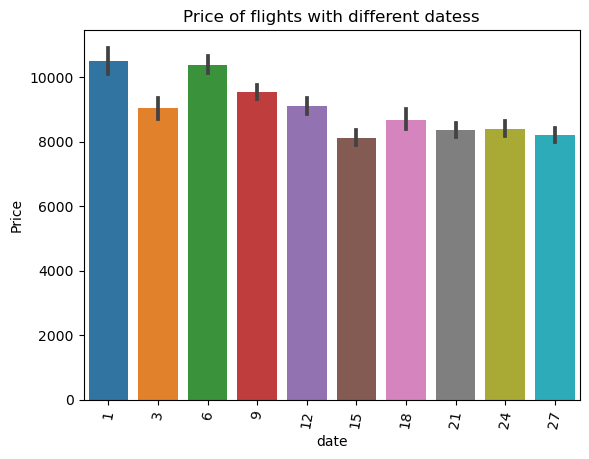

In [54]:
#Journey_Day v/s Average price
v5=sns.barplot(x='Journey_Day', y='Price', data=data)
v5.set_title('Price of flights with different datess')
v5.set_ylabel('Price')
v5.set_xlabel('date')
v5.set_xticklabels(v5.get_xticklabels(), rotation=80)

Analysis : It looks like that there's a trend in the air fare when compared to the day of respective months, prices are higher in the start of month but this is not a trend if you see from the broader perspective as this might be due to various reasons. For eg. the date of Journey is 10th March and people are booking towards 5th March or so, this will lead to higher flight prices.(Prices increase as near you date of booking is to the date of journey). So flight prices don't follow any particular pattern towards any time of the month.

In [55]:
print(data.dtypes)

Airline            object
Source             object
Destination        object
Dep_Time           object
Arrival_Time       object
Duration            int32
Total_Stops        object
Additional_Info    object
Price               int64
Journey_Day        object
Journey_Month      object
weekday            object
dtype: object


# Outlier Detection

In [56]:
ncol=["Duration"]          
for i in ncol:
    q75, q25 = np.percentile(data.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    data = data.drop(data[data.loc[:,i] <= min].index)
    data = data.drop(data[data.loc[:,i] >= max].index)

In [57]:
data.shape

(10607, 12)

LEFT-SKEWED DISTRIBUTION

In [60]:
price_data = data['Price']

Text(0.5, 1.0, 'Price Distribution for Flights')

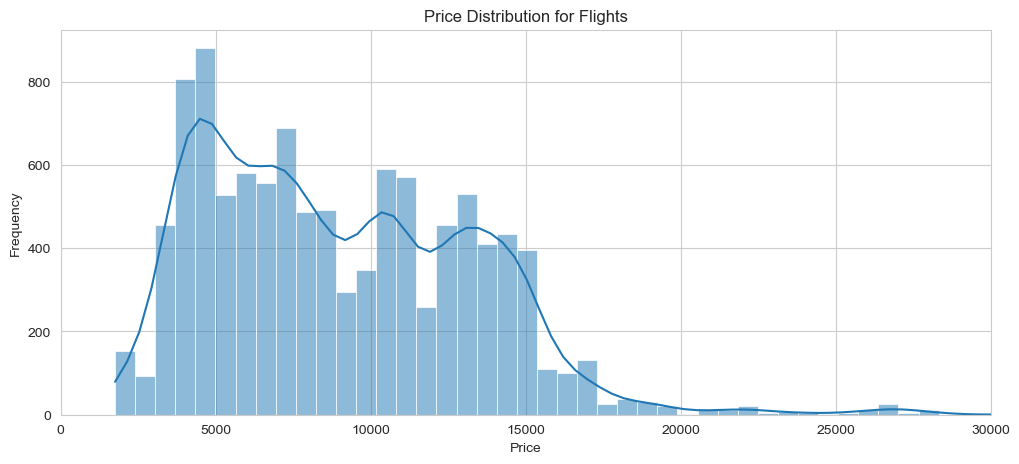

In [61]:
plt.figure(figsize=(12, 5))

sns.set_style("whitegrid")
sns.histplot(price_data, kde=True)
plt.xlim(0, 30000)

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution for Flights')

#  Correlation tests

Pearson correlation coefficient : To check the linear association between the target variable and independent continuous variable.(this condition needs to be met)

H0: Two variables are not correlated

H1: Two variables are correlated

if p-value < 0.05, then we reject the null hypothesis and accept the H1, saying they are correlated.

AttributeError: 'JointGrid' object has no attribute 'annotate'

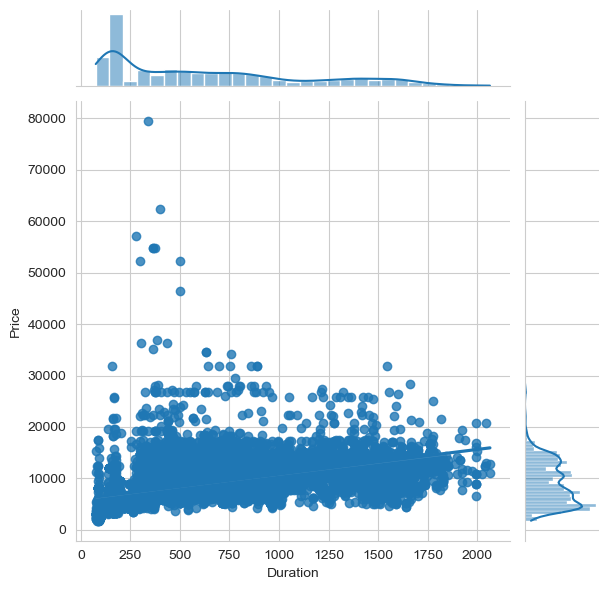

In [95]:
import scipy.stats as stats
_ = sns.jointplot(x='Duration',y='Price',data=data,kind = 'reg')
_.annotate(stats.pearsonr)
plt.show()

We get p-value < 0.05, hence we accept H1 and say the target variable and continuous independent variable are correlated. r = 0.51 says they are moderately related.

In [ ]:
test_data = pd.read_excel("Test_set.xlsx")

In [96]:
test_data.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50
